### 1.

A partir del dataset mnist (tf.keras.datasets.cifar10.load_data()), realiza una clasificación usando:

** Las imágenes son a color, es decir, tienen 3 dimensiones (rgb). Para este problema, antes de empezar, transforma las imágenes a blanco y negro para que tengan 1 sola dimensión de profundidad **. 

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

2. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

¿ Cuál ha dado mejor resultado?

Para compilar el modelo, usa:

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 2.

**BONUS: Entrena la red neuronal 1 pero esta vez con las imágenes a color.**
___________________

In [1]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from argparse import ArgumentParser
from keras.utils import np_utils

2.3.1


In [2]:
pictures_cifar10 = tf.keras.datasets.cifar10
pictures_cifar10

&lt;module &#39;tensorflow.keras.datasets.cifar10&#39; from &#39;C:\\Users\\jl\\AppData\\Roaming\\Python\\Python38\\site-packages\\tensorflow\\keras\\datasets\\cifar10\\__init__.py&#39;&gt;

In [9]:
(train_images, train_labels), (test_images, test_labels) = pictures_cifar10.load_data()


1. ### Éstas son las características generales de CIFAR-10::

    - Se compone de 60.000 imágenes.
    - Cada imagen es 32x32x3, en espacio RGB.
    - Hay 10.000 imágenes de prueba.
    - Hay 10 clases, donde cada una está representada por 6.000 imágenes.
    - Las clases son mutuamente excluyentes (es decir, una misma foto no puede pertenecer a más de una clase).



In [5]:

CIFAR_10_CLASSES = ['airplane',  
                    'automobile',  
                    'bird',  
                    'cat',  
                    'deer',  
                    'dog', 
                    'frog',  
                    'horse',  
                    'ship',  
                    'truck']  

## Exploro el set de datos

Hay 50,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 32x32:

In [15]:
train_images.shape

(50000, 32, 32, 3)

In [16]:
train_labels.shape

(50000, 1)

In [17]:
len(train_labels)

50000

Cada etiqueta es un integer entre 0 y 9 y hay 50.000

In [62]:
train_labels.shape

(50000, 1)

In [19]:
print (train_labels)
len(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


50000

In [24]:
print(test_images.shape) 
len(test_labels)

(10000, 32, 32, 3)


10000

## Pre-procese el set de datos
Al ver la primera imagen me doy cuenta que los pixeles están entre 0 y 255.

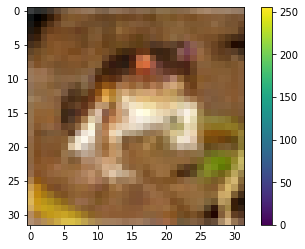

In [21]:
# Muestro la primera imagen del conjunto de entrenamiento
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [111]:
# Veo su etiqueta
train_labels[0]

array([6], dtype=uint8)

Las fotografias están en color, las convierto a escala de grises

In [27]:
train_images.shape

(50000, 32, 32, 3)

In [44]:
train_images_2 = np.dot(train_images,[0.3,0.59,0.11])
test_images_2 = np.dot(test_images,[0.3,0.59,0.11])

In [45]:
train_images_2.shape

(50000, 32, 32)

In [46]:
test_images_2.shape

(10000, 32, 32)

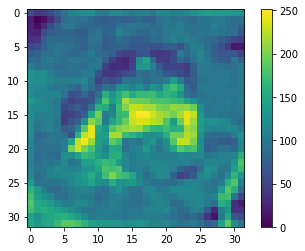

In [47]:
plt.figure()
plt.imshow(train_images_2[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escalo estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal(los normalizo). Para hacerlo, divido los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:
Al mismo tiempo aprovecho para asegurarnos de que los datos estén representados con floats de 32-bits y los paso a ese tipo. Esto es para evitar

In [48]:
train_images_2 = train_images_2.astype('float32') / 255.0

test_images_2 = test_images_2.astype('float32') / 255.0

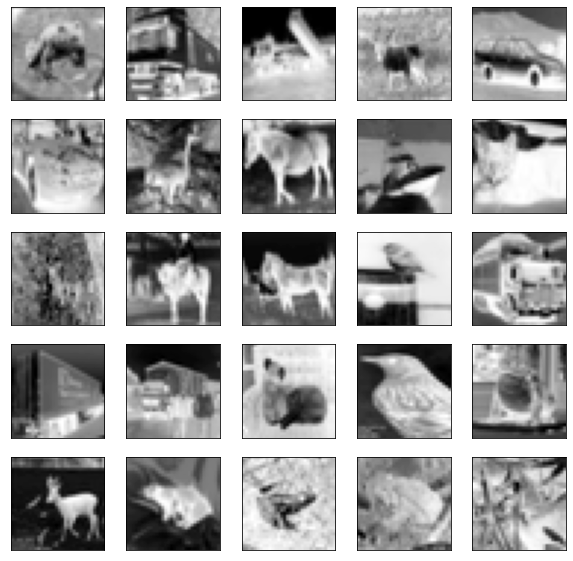

In [59]:
# Con cmap=plt.cm.binary paso las imagens a una escala de grises.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_2[i], cmap=plt.cm.binary)
   #plt.xlabel(CIFAR_10_CLASSES[etiqueta[i]])
plt.show()

# APARTADO 1

Realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

In [71]:
# Debido a que son imágenes en escala de grises, el único canal de color se halla implícito. Sin embargo, Keras espera tensores de 4 dimensiones (incluyendo el batch size), no de 3, por lo que tenemos que expandir las dimensiones de los datos.
train_images_gr = train_images_2.reshape(train_images_2.shape[0], 32, 32, 1)
test_images_gr = test_images_2.reshape(test_images_2.shape[0], 32, 32, 1)

print("train_images_gr shape:", train_images_gr.shape)
print("test_images_gr shape:", test_images_gr.shape)

train_images_gr shape: (50000, 32, 32, 1)
test_images_gr shape: (10000, 32, 32, 1)


In [72]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (32,32,1)

model = keras.models.Sequential()

# First conv-pool layers with 8 neurons and MaxPool2d
model.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model.add(keras.layers.Flatten())

# Dense layer (32 neurons) with dropout (0.25)
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(keras.layers.Dropout(rate=0.25))
# Output layer with 10 neurons
model.add(keras.layers.Dense(units=10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1800)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                57632     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 58,042
Trainable params: 58,042
Non-trainable params: 0
____________________________________________________

### Compilo el modelo
Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo

Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [73]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Entreno el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en `train_images_gr` y `train_labels`.
2. el modelo aprende a asociar imagenes y etiquetas.
3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo `test_images`. Verifique que las predicciones sean iguales a las etiquetas de el arreglo`test_labels`.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [74]:
history = model.fit(train_images_gr, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.9926 - accuracy: 0.2533
Epoch 2/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.7944 - accuracy: 0.3362
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.7240 - accuracy: 0.3652
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.6782 - accuracy: 0.3837
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.6461 - accuracy: 0.3961
Epoch 6/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.6201 - accuracy: 0.4062
Epoch 7/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.5864 - accuracy: 0.4195
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5678 - accuracy: 0.4275
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.5451 - accuracy: 0.4367
Epoch 10/10
1563/1563 [==============================] - 46s 29m

## Evaluar Exactitud

Comparo el rendimiento del modelo con el set de datos:

In [75]:
test_loss, test_acc = model.evaluate(test_images_2,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 1.4090 - accuracy: 0.5093

Test accuracy: 0.5092999935150146


## Hacer predicciones
Con el modelo entrenado puedo hacer predicciones sobre imágenes

In [76]:
predictions = model.predict(test_images_2)

In [77]:
predictions[0]

array([0.03589612, 0.01374712, 0.19268711, 0.13094722, 0.13582373,
       0.08150017, 0.30409116, 0.03153197, 0.05564779, 0.01812762],
      dtype=float32)

In [78]:
np.argmax(predictions[0])

6

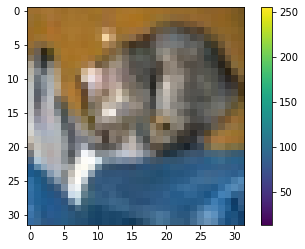

In [112]:
# Muestro la imagen test_images[0] en color
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

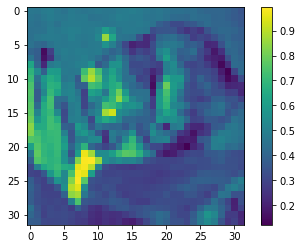

In [110]:
# La misma pero en dos colores
plt.figure()
plt.imshow(test_images_2[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [79]:
#Ahora compruebo que etiqueta tiene ese elemento del conjunto de test y como sale 6, implica que es incorrecta la predicción
test_labels[0]

array([3], dtype=uint8)

HA FALLADO EN LA PREDICCION PORQUE LA ETIQUETA ES DE UN GATO

In [86]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(CIFAR_10_CLASSES[predicted_label],
                                100*np.max(predictions_array),
                                CIFAR_10_CLASSES[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [87]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

In [88]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [89]:
img = test_images_2[20]

print(img.shape)

(32, 32)


Ahora predigo la etiqueta correcta para esta imagen:

In [90]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32)


In [91]:
predictions_single = model.predict(img)

print(predictions_single)

[[0.12844138 0.02681198 0.02007037 0.09314417 0.08325505 0.1194297
  0.00402171 0.4947096  0.00475323 0.02536272]]


In [95]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)



TypeError: only integer scalar arrays can be converted to a scalar index

In [96]:
# Número que predice
np.argmax(predictions_single[0])

7

# APARTADO 2

Realiza una clasificación usando:

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 16 neuronas    
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)

## Construir el Modelo

Construyo la red neuronal, configuro las capas del modelo y luego compilo el modelo.

El conjunto de train y de text sigue siendo el mismo que el utilizado para el apartado 1

In [97]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (32,32,1)

model2 = keras.models.Sequential()

# First conv-pool layers with 8 neurons and MaxPool2d
model2.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model2.add(keras.layers.Flatten())

# Dense layer with 16 neurons
model2.add(keras.layers.Dense(units=16, activation="relu"))

# Dense layer (32 neurons) with dropout (0.25)
model2.add(keras.layers.Dense(units=32, activation="relu"))
model2.add(keras.layers.Dropout(rate=0.25))

# Output layer with 10 neurons
model2.add(keras.layers.Dense(units=10, activation="softmax"))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                28816     
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [100]:
# Compilo
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Para comenzar a entrenar, llame el metodo `model2.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [101]:
history = model2.fit(train_images_gr, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.8539 - accuracy: 0.3143
Epoch 2/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.6100 - accuracy: 0.4234
Epoch 3/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.5354 - accuracy: 0.4555
Epoch 4/10
1563/1563 [==============================] - 104s 66ms/step - loss: 1.4834 - accuracy: 0.4788
Epoch 5/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4421 - accuracy: 0.4924
Epoch 6/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4091 - accuracy: 0.5025
Epoch 7/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.3846 - accuracy: 0.5135
Epoch 8/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.3562 - accuracy: 0.5251
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.3394 - accuracy: 0.5290
Epoch 10/10
1563/1563 [==============================] - 59

## Evaluar Exactitud

Comparo el rendimiento del modelo con el set de datos:

In [104]:
test_loss2, test_acc2 = model2.evaluate(test_images_2,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc2)

313/313 - 3s - loss: 1.3117 - accuracy: 0.5344

Test accuracy: 0.5343999862670898


In [ ]:
## Hago predicciones

Con el modelo entrenado puede usarlo para hacer predicciones sobre imagenes.

In [108]:
predictions2 = model2.predict(test_images_2)
predictions2[0] # Estoy prediciendo la imagen nº 22

array([0.01549911, 0.00539024, 0.13825478, 0.20583422, 0.06482787,
       0.13581976, 0.3583665 , 0.03192264, 0.03281755, 0.01126734],
      dtype=float32)

In [109]:
np.argmax(predictions2[0])

6

In [113]:
# Compruebo que esa sea realmente la etiqueta de la test images_2[0]
test_labels[0]

array([3], dtype=uint8)

HA FALLADO EN LA PREDICCION PORQUE LA ETIQUETA  CON ÍNDICE 3 ES DE UN GATO Y NO DE UNA RANA (ÍNDICE 6)
_________________

### 2.

**BONUS: Entrena la red neuronal 1 pero esta vez con las imágenes a color.**

1. Una CNN con:
    - 1 capa convolutiva con 8 neuronas
    - 1 MaxPool quedando las dimensiones de la imagen a la mitad
    - 1 dropout 0.25
    - 1 Flatten
    - 1 dense con 32 neuronas
    - 1 dense con 10 (salida)


El conjunto de train y de text sigue siendo el mismo que el utilizado para el apartado 1.

Utilizo las variables train_images_2 y test_images_2 que ya están normalizadas y pasadas type float32

In [132]:
# codificacion en caliente de la salida
train_labels3 = np_utils.to_categorical(train_labels)
test_labels3 = np_utils.to_categorical(test_labels)
num_classes = test_labels3.shape[1]

In [133]:
train_labels3.shape

(50000, 10, 2)

In [134]:
test_labels3.shape

(10000, 10, 2)

In [118]:
num_classes

10

## Construir el Modelo

Construyo la red neuronal, configuro las capas del modelo y luego compilo el modelo.

In [127]:
tf.config.run_functions_eagerly(True)


INPUT_SHAPE = (32,32,3)

model3 = keras.models.Sequential()

# First conv-pool layers with 8 neurons and MaxPool2d
model3.add(keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="valid", input_shape=INPUT_SHAPE))
model3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

# Flatten layer
model3.add(keras.layers.Flatten())

# Dense layer (32 neurons) with dropout (0.25)
model3.add(keras.layers.Dense(units=32, activation="relu"))
model3.add(keras.layers.Dropout(rate=0.25))
# Output layer with 10 neurons
model3.add(keras.layers.Dense(units=10, activation="softmax"))
model3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1800)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                57632     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 58,186
Trainable params: 58,186
Non-trainable params: 0
__________________________________________________

In [146]:
# Compilo
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
train_images.shape

(50000, 32, 32, 3)

In [17]:
train_labels.shape

(50000, 1)

PROBARLO DE NUEVO SABIENDO QUE TRAIN_LABELS SHAPE ES (50000, 1)

In [12]:
history = model3.fit(train_images, train_labels, epochs=10, verbose=2)

NameError: name &#39;model3&#39; is not defined

In [4]:
(X_train, y_train), (X_test, y_test) = pictures_cifar10.load_data()

#normalizamos tanto X_train como X_test
X_train = X_train/255
X_test = X_test/255